# Evaluation of pressure coefficients

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import fetch_surface_data

mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

exp_data = "../exp_data/"
run = "../run/"
output = "./output/"
!mkdir -p output

print("Matplolib version: ", mpl.__version__)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)

Matplolib version:  3.3.3
Pandas version:  1.2.1
Numpy version:  1.19.5


## Experimental pressure coefficient data

In [56]:
cp_exp = {}
names = ["x", "cp"]
for s in ["set1", "set4", "set5", "set6"]:
    cp_exp[s] = (
        pd.read_csv(exp_data + "{:s}_cp_upper.csv".format(s), sep=",", names=names, header=0),
        pd.read_csv(exp_data + "{:s}_cp_lower.csv".format(s), sep=",", names=names, header=0)
    )
cp_exp["set1"][0].head()

,x,cp
0,0.000,1.060
1,0.025,-0.532
2,0.050,-0.739
3,0.075,-0.904
4,0.100,-0.970


## Influence of various simulation parameters on set 1 with $\alpha =2$
### Expansion ratio in surface normal direction

In [89]:
set_1_df = ["set1_alpha2_iddes_g{:d}".format(i) for i in [2500, 5000, 10000, 20000]]
set_1_wf = ["set1_alpha2_iddes_spalding_g{:d}".format(i) for i in [2500, 5000, 10000, 20000]]

final_times_df = ["0.14", "0.25", "0.25", "0.22"]
final_times_wl = ["0.21", "0.25", "0.25", "0.17"]

cp_path_df = ["postProcessing/surface/{:s}/total(p)_coeff_airfoil.raw".format(t) for t in final_times_df]
cp_path_wf = ["postProcessing/surface/{:s}/total(p)_coeff_airfoil.raw".format(t) for t in final_times_wl]
yp_path_df = ["postProcessing/surface/{:s}/yPlus_airfoil.raw".format(t) for t in final_times_df]
yp_path_wf = ["postProcessing/surface/{:s}/yPlus_airfoil.raw".format(t) for t in final_times_wl]

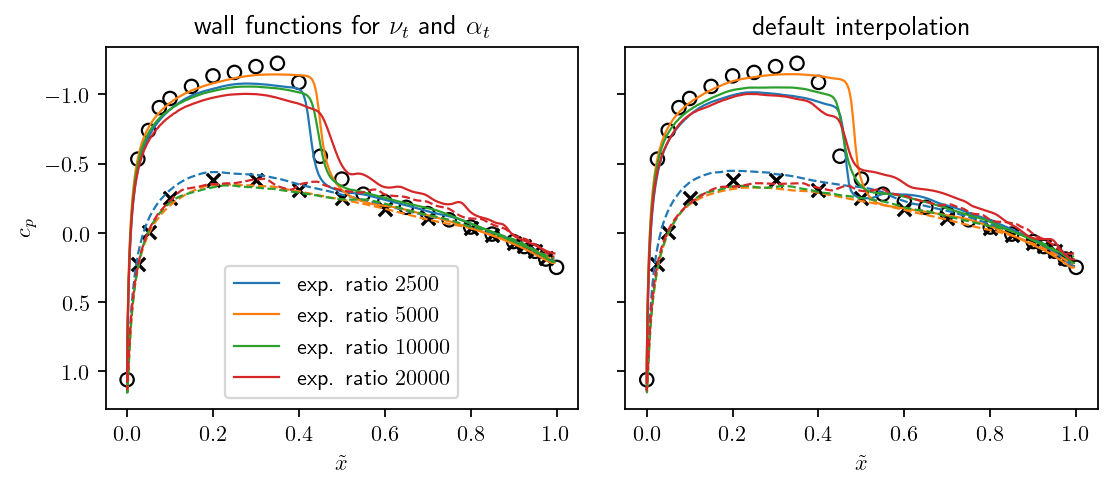

In [90]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

lw = 1.0
labels = [r"exp. ratio ${:d}$".format(r) for r in [2500, 5000, 10000, 20000]]

for i in range(len(set_1_wf)):
    path = run + set_1_wf[i] + "/" + c_path_wf[i]
    x_up, cp_up, x_low, cp_low = fetch_surface_data(path)
    axarr[0].plot(x_up, cp_up, c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    axarr[0].plot(x_low, cp_low, c="C{:d}".format(i), ls="--", lw=lw)
    
for i in range(len(set_1_df)):
    path = run + set_1_df[i] + "/" + c_path_df[i]
    x_up, cp_up, x_low, cp_low = fetch_cp_num(path)
    axarr[1].plot(x_up, cp_up, c="C{:d}".format(i), ls="-", lw=lw)
    axarr[1].plot(x_low, cp_low, c="C{:d}".format(i), ls="--", lw=lw)

data_up, data_low = cp_exp["set1"]
for ax in axarr:
    ax.scatter(data_up.x, data_up.cp, marker="o", color="k", facecolor="none")
    ax.scatter(data_low.x, data_low.cp, marker="x", color="k")
    ax.set_xlabel(r"$\tilde{x}$")

axarr[0].legend()
axarr[0].set_ylabel(r"$c_p$")
axarr[0].set_title(r"wall functions for $\nu_t$ and $\alpha_t$")
axarr[1].set_title(r"default interpolation")
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_cp_grading.pdf", bbox_inches="tight")
plt.show()

wall functions, expansion ratio 2500
yPlus mean/min/max upper side: 32.5410/12.3486/48.6226
yPlus mean/min/max lower side: 34.7324/6.8641/39.3674
-------------------------------------------------------
wall functions, expansion ratio 5000
yPlus mean/min/max upper side: 17.6866/5.7541/25.9372
yPlus mean/min/max lower side: 19.1004/4.0063/21.6463
-------------------------------------------------------
wall functions, expansion ratio 10000
yPlus mean/min/max upper side: 9.8695/2.9545/13.9135
yPlus mean/min/max lower side: 10.6413/2.9356/12.2444
-------------------------------------------------------
wall functions, expansion ratio 20000
yPlus mean/min/max upper side: 5.4707/2.4982/7.9770
yPlus mean/min/max lower side: 5.8768/1.7007/6.9756
-------------------------------------------------------
default interp., expansion ratio 2500
yPlus mean/min/max upper side: 23.9130/15.4083/28.1466
yPlus mean/min/max lower side: 24.5408/4.9830/26.3913
---------------------------------------------------

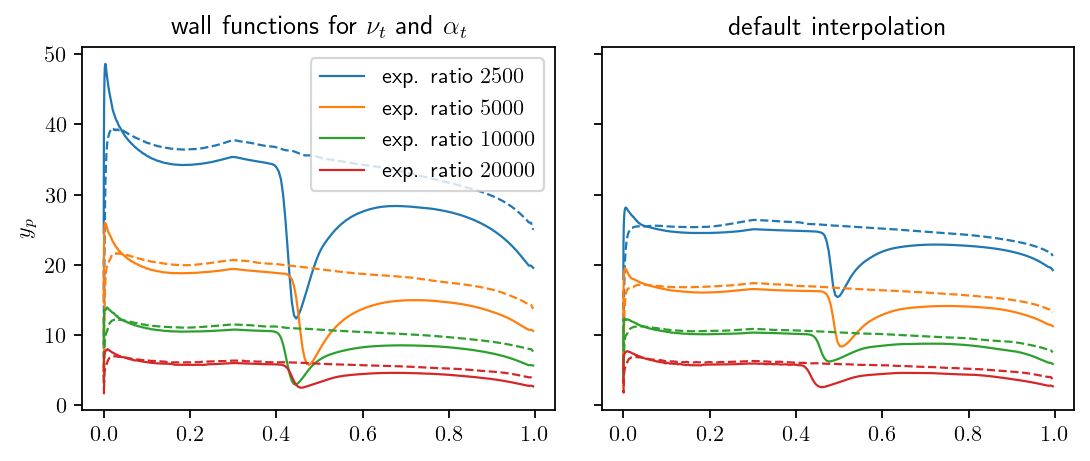

In [91]:
fig, axarr = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

lw = 1.0
labels = [r"exp. ratio ${:d}$".format(r) for r in [2500, 5000, 10000, 20000]]

for i in range(len(set_1_wf)):
    path = run + set_1_wf[i] + "/" + yp_path_wf[i]
    x_up, yp_up, x_low, yp_low = fetch_surface_data(path)
    print("wall functions, expansion ratio {:d}".format(2500*2**i))
    print("yPlus mean/min/max upper side: {:2.4f}/{:2.4f}/{:2.4f}".format(np.mean(yp_up), np.min(yp_up), np.max(yp_up)))
    print("yPlus mean/min/max lower side: {:2.4f}/{:2.4f}/{:2.4f}".format(np.mean(yp_low), np.min(yp_low), np.max(yp_low)))
    print("-"*55)
    axarr[0].plot(x_up, yp_up, c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    axarr[0].plot(x_low, yp_low, c="C{:d}".format(i), ls="--", lw=lw)
    
for i in range(len(set_1_df)):
    path = run + set_1_df[i] + "/" + yp_path_df[i]
    x_up, yp_up, x_low, yp_low = fetch_surface_data(path)
    print("default interp., expansion ratio {:d}".format(2500*2**i))
    print("yPlus mean/min/max upper side: {:2.4f}/{:2.4f}/{:2.4f}".format(np.mean(yp_up), np.min(yp_up), np.max(yp_up)))
    print("yPlus mean/min/max lower side: {:2.4f}/{:2.4f}/{:2.4f}".format(np.mean(yp_low), np.min(yp_low), np.max(yp_low)))
    print("-"*55)
    axarr[1].plot(x_up, yp_up, c="C{:d}".format(i), ls="-", lw=lw, label=labels[i])
    axarr[1].plot(x_low, yp_low, c="C{:d}".format(i), ls="--", lw=lw)
    
axarr[0].legend()
axarr[0].set_ylabel(r"$y_p$")
axarr[0].set_title(r"wall functions for $\nu_t$ and $\alpha_t$")
axarr[1].set_title(r"default interpolation")
plt.subplots_adjust(wspace=0.1)
plt.savefig(output + "set1_yp_grading.pdf", bbox_inches="tight")
plt.show()